# **Assignment 2: Numpy and Pytorch for Deep Learning**

<font color="red">***Important: Before starting the assignment, please COPY this notebook into your OWN google drive by clicking on "File" and "Save a copy in drive"***</font>

---


# **Mission Overview: 🍟**

Welcome Deep Fry research recruit! You have been selected to be a part of our super secret Delicious Fryer Institute, an elite kitchen run by Head Chef Randall Balestriero to solve the world's most challenging culinary problems using the ancient art of deep frying. You need to complete the following cooking protocol to gain the required clearance to be able to batter, fry, and optimize the crispy delights core to the DFI.

**You are required to complete the following 4 modules to earn your certification as a DFI recruit. This mission will cover the following topics:**

1. **Introduction to Numpy** - Batter Fundamentals
2. **Introduction to Pytorch**  - Oil Temperature Mastery
3. **Optimizers: The Learning Algorithms** - Perfecting Your Fry Time
4. **Putting it All Together: Building a Model** - Crafting Your Signature Deep-Fried Masterpiece

**Each module builds progressively and will be very useful for the next week's assignment!**

---

# **Introduction to NumPy**

NumPy is a powerful Python library for numerical computing. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. We recommend you can refer to this <ins>[this](https://www.w3schools.com/python)</ins> for details.

Whenever we want to work with NumPy, we need to import the library. The common convention is to use `import numpy as np` so we can short hand the calls to `np.()` and not have to write `numpy.()` each time.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) # Set random seed for reproducible results

print(f"NumPy version: {np.__version__}")

NumPy version: 2.2.6


## **Why NumPy?**

Before we dive into NumPy arrays, let's understand why we don't just use regular Python lists. Regular Python is manually processing data one sample at a time, while NumPy can process thousands of samples simultaneously.

NumPy's speed comes from:

- Compiled C code under the hood (vs. interpreted Python)
- Vectorized operations that process arrays as single units
- Memory efficiency with homogeneous data types
- Optimized algorithms for mathematical operations

This performance advantage becomes crucial when working with large datasets and big data is essential for deep learning!

You can run the following code block to see the realized NumPy speed ups on simple array processing. You can see that the Python code requires a loop, but NumPy allows for vectorized operations where a single line can operate over the entire array, and does so much faster!

In [3]:
import time

# Let's simulate processing 1 million data points
data_size = 1000000

# Method 1: Pure Python (the slow way)
python_list = list(range(data_size))

start_time = time.time()
python_result = []  # Manual processing
for x in python_list:
    python_result.append(x * 2 + 1)
python_time = time.time() - start_time

# Method 2: NumPy (the fast way)
numpy_array = np.array(python_list)

start_time = time.time()
numpy_result = numpy_array * 2 + 1  # Vectorized processing
numpy_time = time.time() - start_time

print(f"Results match: {python_result[:5] == numpy_result[:5].tolist()}")
print(f"Processing {data_size:,} data points:")
print(f"Python list method: {python_time:.4f} seconds")
print(f"NumPy array method:  {numpy_time:.4f} seconds")
print(f"NumPy is {python_time/numpy_time:.1f}x faster!")

Results match: True
Processing 1,000,000 data points:
Python list method: 0.0669 seconds
NumPy array method:  0.0023 seconds
NumPy is 28.5x faster!


## **The Foundation: N-Dimensional Arrays**
NumPy's core data structure is the n-dimensional array (`ndarray`). Unlike Python lists, NumPy arrays:

- Store elements of the same data type (homogeneous)
- Have a fixed size once created
- Support efficient mathematical operations
- Can have multiple dimensions

The key advantage is that NumPy arrays are optimized for numerical computations and use contiguous memory, making operations much faster than Python lists.

In [4]:
# Creating some data arrays
sensor_readings = np.array([23.1, 24.5, 22.8, 25.2, 23.9])  # 1D: ex. temperature sensors
experimental_matrix = np.array([[1.2, 3.4, 2.1],
                               [2.8, 1.9, 4.2],
                               [3.1, 2.7, 1.8]])  # 2D: ex. experimental results

print("1D Sensor readings shape:", sensor_readings.shape)
print("2D Experimental matrix shape:", experimental_matrix.shape)
print("Data type:", sensor_readings.dtype)

1D Sensor readings shape: (5,)
2D Experimental matrix shape: (3, 3)
Data type: float64


## **Array Generation: Manufacturing Your Data**

Rather than manually typing array values, NumPy provides functions to generate arrays with specific patterns or properties.

Common array creation functions:

- `zeros()`, `ones()`: Arrays filled with 0s or 1s
- `arange()`: Sequences with regular steps
- `linspace()`: Evenly spaced values over an interval
- `eye()`: Identity matrices
- `full()`: Arrays filled with a specific value

In [5]:
zeros_matrix = np.zeros((3, 4))          # Initialize empty grid
ones_vector = np.ones(5)                 # Initialize ones array
identity_matrix = np.eye(3)              # Identity matrix
sequence = np.arange(0, 10, 2)           # Regular intervals: [0, 2, 4, 6, 8]
linear_space = np.linspace(0, 100, 11)   # 11 evenly spaced points from 0 to 100

print("Zeros matrix:")
print(zeros_matrix)
print("Linear space:")
print(linear_space)

Zeros matrix:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Linear space:
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


### **[TODO] ✅ Research Initalization**

Set up the arrays for our research facility in the block below:
1. Create a 'calibration_grid' - a 5x5 matrix filled with zeros
2. Create 'measurement_points' - 15 evenly spaced values from -5.0 to 5.0
3. Create 'time_steps' - integers from 0 to 20 (step of 1)
4. Print all three arrays

In [6]:
# A 'calibration_grid' - a 5x5 matrix filled with zeros
calibration_grid = np.zeros((5, 5))

# 'measurement_points' - 15 evenly spaced values from -5.0 to 5.0
measurement_points = np.linspace(-5,5,15)


# 'time_steps' - integers from 0 to 20 (step of 1)
time_steps = np.arange(0,21,1)

# Print all three arrays
print(f'''
    calibration grid: {calibration_grid}
    measurement points: {measurement_points}
    time_steps: {time_steps}
''')



    calibration grid: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
    measurement points: [-5.         -4.28571429 -3.57142857 -2.85714286 -2.14285714 -1.42857143
 -0.71428571  0.          0.71428571  1.42857143  2.14285714  2.85714286
  3.57142857  4.28571429  5.        ]
    time_steps: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]



## **Mathematical Operations: Your Analytical Tools**

NumPy operations are vectorized by default, meaning they operate on entire arrays element-by-element without explicit loops. When you apply an operation like `+`, `-`, `*`, or `**` to NumPy arrays, the operation is applied to corresponding elements.

In [7]:
# Research measurements from two different techniques
technique_A = np.array([12.3, 15.7, 18.2, 22.1, 19.8])
technique_B = np.array([11.8, 16.2, 17.9, 21.8, 20.1])

# Analytical comparisons
difference = technique_A - technique_B           # Measurement differences
relative_error = difference / technique_A        # Relative error analysis
squared_diff = difference ** 2                  # Squared differences for variance

print("Measurement differences:", difference)
print("Relative errors:", relative_error)
print("Root mean squared error:", np.sqrt(np.mean(squared_diff)))

Measurement differences: [ 0.5 -0.5  0.3  0.3 -0.3]
Relative errors: [ 0.04065041 -0.03184713  0.01648352  0.01357466 -0.01515152]
Root mean squared error: 0.39242833740697197


## **Array Manipulation: Reshaping Your Data**

Reshaping changes the dimensions of an array without changing its data. The total number of elements must remain the same.
Key reshaping operations:

- `reshape()`: Change dimensions while keeping total elements constant
- `flatten()`: Convert any array to 1D
- `transpose()` or `.T`: Swap array dimensions
- `squeeze()`: Remove dimensions of size 1
- `expand_dims()`: Add new dimensions of size 1

In [8]:
# 1D time series data from 12 measurements
time_series = np.arange(1, 13)
print("Original time series:", time_series)

# Reshape into different formats for analysis
monthly_view = time_series.reshape(3, 4)      # 3 months, 4 weeks each
quarterly_view = time_series.reshape(4, 3)    # 4 quarters, 3 months each
weekly_pairs = time_series.reshape(6, 2)      # 6 pairs of measurements
infer_row = time_series.reshape(-1, 2)         # Uses -1 to infer # of rows, 2 columns
infer_col = time_series.reshape(2, -1)        # Uses -1 to infer # of columns, 2 rows

print(time_series.reshape(1, -1))
print("\nMonthly view (3x4):")
print(monthly_view)
print("\nQuarterly view (4x3):")
print(quarterly_view)
print("\nWeekly pairs (6x2):")
print(weekly_pairs)
print("\n Two columns, infer # of rows (6x2):")
print(infer_row)
print("\n Two rows, infer # of columns (2x6):")
print(infer_col)

# Advanced reshaping
flattened = monthly_view.flatten()            # Back to 1D
transposed = monthly_view.T                   # Transpose (swap dimensions)

print("\nFlattened back to 1D:", flattened)
print("\nTransposed (4x3):")
print(transposed)

Original time series: [ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3  4  5  6  7  8  9 10 11 12]]

Monthly view (3x4):
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Quarterly view (4x3):
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Weekly pairs (6x2):
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]

 Two columns, infer # of rows (6x2):
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]

 Two rows, infer # of columns (2x6):
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]

Flattened back to 1D: [ 1  2  3  4  5  6  7  8  9 10 11 12]

Transposed (4x3):
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


### **[TODO] ✅ Manipulating your research**

1. Create  `daily_blocks` - Reshape `hourly_data` into a 4x6 array (4 blocks of 6 hours each)
2. Create `work_shifts` - reshape the same data into 3x8 (3 shifts of 8 hours)
3. Transpose the daily_blocks to get `time_blocks` (6x4)
4. Flatten `work_shifts` back into a 1D array called `flattened_shifts`
5. Print all results with labels

In [9]:
# Laboratory collected 24 hourly measurements
hourly_data = np.arange(100, 124)  # Values from 100 to 123

# Created daily_blocks - Reshape hourly_data into a 4x6 array (4 blocks of 6 hours each)
daily_blocks = hourly_data.reshape(4,6)

# Created work_shifts - reshape the same data into 3x8 (3 shifts of 8 hours)
work_shifts = hourly_data.reshape(3,8)

# Transposed the daily_blocks to get time_blocks (6x4)
time_blocks = daily_blocks.T

# Flattened work_shifts back into a 1D array called flattened_shifts
flattened_shifts = work_shifts.flatten()

# Printed all results with labels
print(f'''
    daily_blocks = {daily_blocks}
    work_shifts = {work_shifts}
    time_blocks = {time_blocks}
    flattened_shifts = {flattened_shifts}
''')


    daily_blocks = [[100 101 102 103 104 105]
 [106 107 108 109 110 111]
 [112 113 114 115 116 117]
 [118 119 120 121 122 123]]
    work_shifts = [[100 101 102 103 104 105 106 107]
 [108 109 110 111 112 113 114 115]
 [116 117 118 119 120 121 122 123]]
    time_blocks = [[100 106 112 118]
 [101 107 113 119]
 [102 108 114 120]
 [103 109 115 121]
 [104 110 116 122]
 [105 111 117 123]]
    flattened_shifts = [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123]



## Array Indexing and Slicing: Extracting Insights

Indexing allows you to access specific elements, while slicing extracts portions of arrays. NumPy extends Python's indexing with powerful multi-dimensional capabilities.

- Single element: `array[row, col]` for 2D arrays
- Slicing: `array[start:end:step]` to extract ranges
- Negative indices: Count from the end (-1 is last element)
- Multi-dimensional: Each dimension separated by commas
- Boolean indexing: Use conditions to select elements

Understanding indexing is crucial because much of DL wuill require operating on subsets of larger datasets (i.e. splitting testing and validation set, etc.)

In [11]:
# Sample research data: daily measurements over 2 weeks
daily_measurements = np.array([
    [22.1, 45.3, 78.2, 12.7, 33.8, 56.1, 89.4],  # Week 1
    [24.5, 47.1, 76.8, 15.2, 31.9, 58.3, 87.6]   # Week 2
])

# Accessing specific data points
first_day_week1 = daily_measurements[0, 0]        # Single measurement
week1_data = daily_measurements[0, :]             # Entire first week
all_day3_measurements = daily_measurements[:, 2]  # Day 3 from both weeks
subset = daily_measurements[0:2, 1:4]             # Partial data extraction

print("First day of week 1:", first_day_week1)
print("All Day 3 measurements:", all_day3_measurements)
print("Data subset:")
print(subset)

First day of week 1: 22.1
All Day 3 measurements: [78.2 76.8]
Data subset:
[[45.3 78.2 12.7]
 [47.1 76.8 15.2]]


## Broadcasting: Efficient Multi-Scale Operations

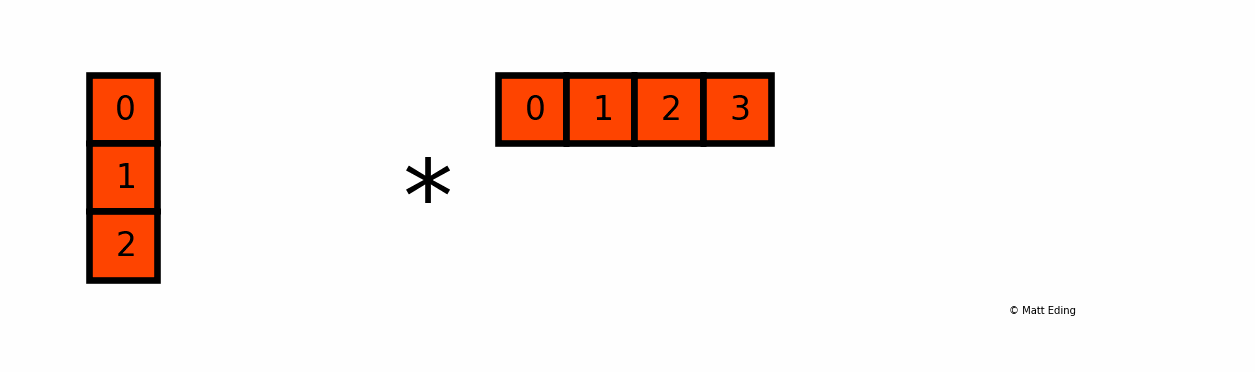

Broadcasting is NumPy's mechanism for performing element-wise operations between arrays that don't share identical shapes. Rather than forcing you to manually reshape arrays or write explicit loops, NumPy "stretches" the smaller arrays to match the larger ones during computation, but in a memory-efficient and temporary manner (behind the scenes NumPy magic).

### Breaking It Down

NumPy evaluates compatibility by evaluating array shapes from right to left, starting with the trailing dimensions. This rightward-first approach is similar to how we naturally think about nested structures, where the innermost elements are processed first.

For example, if we look at the at the case
```python
Array A: (3, 1, 4)
Array B:    (2, 4)
```
We can break this down from the eyes of NumPy as
```python
A: 3 × 1 × 4
B:     2 × 4
```
Now, putting yourself in the shoes in the eyes of a NumPy computer, working from right to left, dimension 4 matches dimension 4 perfectly. Dimension 1 can stretch to match dimension 2 (this is important that the dimension is one). The leftmost dimension 3 has no counterpart in B, so B conceptually gains a dimension of size 1 that can stretch to 3.

**The Rules of Stretching!**

A dimension can be broadcast when either array has size 1 in that position, because a single value can be logically repeated to fill any length. When one array lacks a dimension entirely, NumPy treats it as having size 1 in that position, making it eligible for stretching.

Broadcasting might seem amazing and the catch all to all of our ails, but the rules are pretty specific. For example, many people will finish reading this section (if you even did), and think that the array `(3, 4)` can be broadcast with the array `(2, 4)`. However, the `(3, 4)` array cannot broadcast with a `(2, 4)` array because neither the 3 nor the 2 is equal to 1, making them incompatible for stretching.

In [12]:
# Base experimental data
base_measurements = np.array([[10, 20, 30],
                             [40, 50, 60],
                             [70, 80, 90]])

# Single calibration offset (scalar)
calibration_offset = 5
calibrated_data = base_measurements + calibration_offset

print("Original measurements:")
print(base_measurements)
print("\nAfter calibration (+5):")
print(calibrated_data)

# Daily correction factors (1D array broadcast to 2D)
daily_corrections = np.array([1.1, 1.0, 0.9])  # 3 correction factors
corrected_data = base_measurements * daily_corrections  # Broadcast vertically

print("\nAfter daily corrections:")
print(corrected_data)

Original measurements:
[[10 20 30]
 [40 50 60]
 [70 80 90]]

After calibration (+5):
[[15 25 35]
 [45 55 65]
 [75 85 95]]

After daily corrections:
[[11. 20. 27.]
 [44. 50. 54.]
 [77. 80. 81.]]


### **[TODO] ✅ Apply Laboratory-Wide Corrections**

Our research facility has collected some data from our underwater sensors. We need to calibrate the data and correct the readings for time-drift. Your job is to:
1. Apply sensor calibrations (multiply each sensor's data by its calibration factor)
2. Apply time corrections (multiply each time period by its correction factor)
3. Calculate the final corrected data and print it
4. Print the shape to verify the result



In [13]:
# Research facility collected data from 4 sensors over 6 time periods
sensor_data = np.array([[12.1, 13.5, 14.2, 13.8, 12.9, 13.7],
                       [25.3, 26.1, 25.9, 26.4, 25.7, 26.0],
                       [38.7, 39.2, 38.9, 39.1, 38.8, 39.0],
                       [51.2, 52.1, 51.8, 52.3, 51.9, 52.0]])

# Individual sensor calibration factors
sensor_calibrations = np.array([0.95, 1.02, 0.98, 1.01])

# Time-based drift corrections
time_corrections = np.array([1.00, 1.01, 1.02, 1.01, 1.00, 0.99])

# Applied sensor calibrations (multiply each sensor's data by its calibration factor) (think about dimensions!)
calibrated_data = sensor_data * sensor_calibrations.reshape(-1, 1)

# Applied time corrections (multiply each time period by its correction factor)
corrected_data = calibrated_data * time_corrections

# TODO: Calculate the final corrected data and print it
print(corrected_data)

# TODO: Print the shape to verify the result
print(corrected_data.shape)


[[11.495   12.95325 13.7598  13.2411  12.255   12.88485]
 [25.806   26.88822 26.94636 27.19728 26.214   26.2548 ]
 [37.926   38.80016 38.88444 38.70118 38.024   37.8378 ]
 [51.712   53.14721 53.36436 53.35123 52.419   51.9948 ]]
(4, 6)


## Random Number Generation: Simulating Experiments
Controlled Randomness for Computational Work
Random number generation techniques is essential for initalizing your weights and biases.

Types of random distributions:

- Uniform: Equal probability across a range
- Normal (Gaussian): Bell curve distribution, common in nature
- Random integers: Discrete values within a range
- Random choice: Selecting from a predefined set of options

Important: Always set a random seed (`np.random.seed()`) when you need reproducible results.

In [14]:
# Set random seed for reproducibility
np.random.seed(123)

# Different types of random data generation
uniform_samples = np.random.uniform(0, 10, size=8)           # Uniform distribution
normal_samples = np.random.normal(25, 3, size=8)            # Normal distribution
integer_samples = np.random.randint(1, 100, size=8)         # Random integers

print("Uniform samples (0-10):", uniform_samples.round(2))
print("Normal samples (μ=25, σ=3):", normal_samples.round(2))
print("Integer samples (1-99):", integer_samples)

# Random matrix for simulation
simulation_matrix = np.random.randn(3, 4)  # Standard normal distribution
print("\nSimulation matrix:")
print(simulation_matrix.round(3))

Uniform samples (0-10): [6.96 2.86 2.27 5.51 7.19 4.23 9.81 6.85]
Normal samples (μ=25, σ=3): [17.72 23.71 28.8  22.4  22.96 24.72 29.47 23.08]
Integer samples (1-99): [56 68  3 85 40 67 85 48]

Simulation matrix:
[[ 1.004  0.386  0.737  1.491]
 [-0.936  1.176 -1.254 -0.638]
 [ 0.907 -1.429 -0.14  -0.862]]


### **[TODO] ✅ Design a Simulation Experiment**

Design a simulation for our testing measurement equipment:
1. Generate `baseline_readings` - 20 measurements from normal distribution (μ=50, σ=2)
2. Generate `noise_factors` - 20 values from uniform distribution (0.8 to 1.2)
3. Calculate `noisy_readings` - multiply `baseline_readings` by `noise_factors`
4. Calculate and print the mean and std of both baseline and noisy readings

In [15]:
# Generate baseline_readings - 20 measurements from normal distribution (μ=50, σ=2)
baseline_readings = np.random.normal(50, 2, size=20)

# Generated noise_factors - 20 values from uniform distribution (0.8 to 1.2)
noise_factors = np.random.uniform(0.8, 1.2, size=20)

# Calculated noisy_readings - multiply baseline_readings by noise_factors
noisy_readings = baseline_readings * noise_factors

# Calculated and printed the mean and std of both baseline and noisy readings

print(f'''
    mean of baseline: {np.mean(baseline_readings)}
    std of baseline: {np.std(baseline_readings)}
    
    mean of noisy: {np.mean(noisy_readings)}
    std of noisy: {np.std(noisy_readings)}
''')




    mean of baseline: 49.932215292533314
    std of baseline: 2.4418051710553206
    
    mean of noisy: 50.68383777427084
    std of noisy: 5.778954637970482



## **[TODO] ✅ Putting it all Together**

Congratulations! You've mastered the essential NumPy tools for the Deep Research Facility. Now let's put it all together in a comprehensive challenge.

**Complete the following comprehensive analysis:**
1. Clean the data by replacing -999 values with the mean of valid readings for each sensor
2. Calculate hourly averages across all sensors (24 values)
3. Calculate sensor reliability (percentage of valid readings per sensor)
4. Find the sensor with highest and lowest average readings
5. Identify hours where average readings exceeded 110
6. Calculate the correlation between sensor 0 and sensor 1 (using valid data only)
  -  Hint: Use `np.corrcoef` to calculate the coefficient and make sure to extract the correct value from the output array
7. Create a summary report printing all findings

In [16]:
# The facility has collected data from a multi-sensor experiment
# 5 sensors, 24 hour periods, with some data quality issues

# Generate realistic sensor data with some issues
perfect_data = np.random.normal(100, 10, size=(5, 24))
noise = np.random.normal(0, 2, size=(5, 24))
sensor_data = perfect_data + noise

# Introduce some sensor malfunctions (set random values to -999)
malfunction_indices = np.random.choice(120, size=12, replace=False)
sensor_data.flat[malfunction_indices] = -999

print("Raw sensor data shape:", sensor_data.shape)
print("\nSample of raw data (first 3 sensors, first 8 hours):\n", sensor_data[:3, :8])

# Clean the data by replacing -999 values with the mean of valid readings for each sensor
cleaned_data = sensor_data.copy()
for i in range(cleaned_data.shape[0]):
    valid_mask = cleaned_data[i] != -999
    sensor_mean = cleaned_data[i][valid_mask].mean()
    cleaned_data[i][~valid_mask] = sensor_mean

# Calculate hourly averages across all sensors (24 values)
hourly_averages = cleaned_data.mean(axis=0)

# Calculate sensor reliability (percentage of valid readings per sensor)
sensor_reliability = (sensor_data != -999).sum(axis=1) / sensor_data.shape[1] * 100

# Find the sensor with highest and lowest average readings
sensor_averages = cleaned_data.mean(axis=1)
highest_sensor = np.argmax(sensor_averages)
lowest_sensor = np.argmin(sensor_averages)

# Identify hours where average readings exceeded 110
high_hours = np.where(hourly_averages > 110)[0]

# Calculate the correlation between sensor 0 and sensor 1 (using valid data only)
correlation = np.corrcoef(cleaned_data[0], cleaned_data[1])[0, 1]

# Create a summary report printing all findings ( better formatting than before! :) )
print(f"\n{'='*50}")
print("SENSOR EXPERIMENT SUMMARY REPORT")
print(f"{'='*50}")
print(f"\nSensor Reliability (% valid readings):")
for i in range(5):
    print(f"  Sensor {i}: {sensor_reliability[i]:.1f}%")
print(f"\nSensor Averages:")
for i in range(5):
    print(f"  Sensor {i}: {sensor_averages[i]:.2f}")
print(f"\nHighest avg sensor: Sensor {highest_sensor} ({sensor_averages[highest_sensor]:.2f})")
print(f"Lowest avg sensor: Sensor {lowest_sensor} ({sensor_averages[lowest_sensor]:.2f})")
print(f"\nHours where avg exceeded 110: {high_hours}")
print(f"Correlation between Sensor 0 and Sensor 1: {correlation:.4f}")

Raw sensor data shape: (5, 24)

Sample of raw data (first 3 sensors, first 8 hours):
 [[  99.35705998 -999.           87.30733964  102.77840922  105.03877585
    91.62851414  112.02120471   88.77573399]
 [ 112.66113866   88.48585907 -999.          108.94645488   95.31168713
   113.53553067   90.94643751   87.10452373]
 [-999.          101.91907552   88.35547473   96.28656179  120.78225393
    79.3513176    97.82388864   95.03824463]]

SENSOR EXPERIMENT SUMMARY REPORT

Sensor Reliability (% valid readings):
  Sensor 0: 91.7%
  Sensor 1: 83.3%
  Sensor 2: 91.7%
  Sensor 3: 87.5%
  Sensor 4: 95.8%

Sensor Averages:
  Sensor 0: 98.47
  Sensor 1: 97.93
  Sensor 2: 100.15
  Sensor 3: 101.13
  Sensor 4: 100.04

Highest avg sensor: Sensor 3 (101.13)
Lowest avg sensor: Sensor 1 (97.93)

Hours where avg exceeded 110: []
Correlation between Sensor 0 and Sensor 1: -0.2137


# ** PyTorch Fundamentals**

Our DL toolkit consists of PyTorch - the industry-standard frameworks for building and training neural networks.

PyTorch handles the low-level computational graphs and automatic differentiation through its autograd system, while also providing a high-level, user-friendly API for building models directly. Thus unlike Tensorflow and Keras, which is course was originally designed in, PyTorch unifies Tensorflow's low-level operations and Keras's high level modeling into one system.

Note: PyTorch is designed via modules and classes:
- torch: most lower level operations
- torch.nn: modeling operations
- torch.optim: optimization
- Dataset: pre-build datasets
- DataLoader: pre-coded dataset parsing

Let us get more familar with PyTorch in the code below:


In [17]:
import torch

torch.manual_seed(42)

print(f"PyTorch version: {torch.__version__}")


PyTorch version: 2.10.0


## **PyTorch Fundamentals: Tensors and Variables**

Tensors are the fundamental data structure in PyTorch - multi-dimensional arrays optimized for mathematical operations. This provides for an intuitive way to structure the large datasets we use to train models. Unlike NumPy arrays, PyTorch tensors can run on GPUs and support automatic differentiation.

In [18]:
# Creating tensors
scalar_tensor = torch.tensor(42.0)                    # 0D tensor (scalar)
vector_tensor = torch.tensor([1.0, 2.0, 3.0])        # 1D tensor (vector)
matrix_tensor = torch.tensor([[1.0, 2.0], [3.0, 4.0]]) # 2D tensor (matrix)

print("Scalar shape:", scalar_tensor.shape)
print("Vector shape:", vector_tensor.shape)
print("Matrix shape:", matrix_tensor.shape)

# Tensor operations
neural_weights = torch.randn(3, 4) * 0.1  # mean=0, stddev=0.1
neural_biases = torch.zeros(4)

print("\nNeural weights shape:", neural_weights.shape)
print("Neural biases shape:", neural_biases.shape)

Scalar shape: torch.Size([])
Vector shape: torch.Size([3])
Matrix shape: torch.Size([2, 2])

Neural weights shape: torch.Size([3, 4])
Neural biases shape: torch.Size([4])


## Parameters: Trainable Tensors
Parameters are special tensors that can be modified during training. These represent the learnable parameters of your neural network - the weights and biases that the model adjusts to learn patterns in your data.

### Key characteristics of Parameters in PyTorch:

- Mutable: Parameters can be changed after creation through .data assignment or in-place operations
- Persistent: Parameters persist across multiple forward passes and are registered with their parent module
- Trainable: Parameters participate in gradient computation automatically through autograd
- Optimizable: Optimizers can automatically update

Parameters during training by accessing model.parameters()

### What makes a parameter "trainable"?

The "requires_grad" attribute determines whether gradients will be computed for this Parameter

- requires_grad=True (default for nn.Parameter): Gradients will be computed and the optimizer will update it
- requires_grad=False: No gradients computed, parameter stays fixed (useful for frozen layers or batch norm statistics)

You can freeze/unfreeze parameters anytime: param.requires_grad = False or param.requires_grad_(False)

In [19]:
from torch import nn #Note we import nn (Neural Network) from PyTorch

network_weights = nn.Parameter(torch.randn(10, 5))
network_biases = nn.Parameter(torch.zeros(5))

print("\nWeights require grad:", network_weights.requires_grad)
print("Initial weight values:")
print(network_weights.data[:3, :])  # Show first 3 rows

# Parameters can be updated using .data or direct assignment
network_biases.data = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5])
print("\nUpdated biases:", network_biases.data)


Weights require grad: True
Initial weight values:
tensor([[ 0.3559, -0.6866, -0.4934,  0.2415, -1.1109],
        [ 0.0915, -2.3169, -0.2168, -0.3097, -0.3957],
        [ 0.8034, -0.6216, -0.5920, -0.0631, -0.8286]])

Updated biases: tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000])


## Layers: Building Blocks of Neural Networks

One of the primary advantages of PyTorch is its flexible, object-oriented approach to building models, primarily through the torch.nn module.

This module provides the essential components to construct complex architectures without needing to implement the underlying linear algebra and gradient tracking from scratch.In PyTorch, layers are treated as Modules. Each layer performs a specific transformation on the input data and automatically manages its own "learnable" parameters (weights and biases).

### Working with nn.Linear (The Dense Layer)

In PyTorch, the a "Dense" or "fully connected" layer is nn.Linear.

When initializing a layer, you must define the geometry of the data flowing through it:
- Initialize with Dimensions: PyTorch generally requires you to explicitly state both the input and output
- sizes.in_features: The number of input features (the size of each input sample).out_features: The number of output features (the number of neurons in the layer). More neurons allow the model to learn more complex representations but increase computational cost.bias (optional): Defaults to True. This determines if the layer learns an additive bias offset ($Wx + b$).
- Activations: In PyTorch, activation functions (like ReLU or Sigmoid) are usually treated as separate modules (e.g., nn.ReLU())
- The Forward Pass: Once initialized, you pass data through the layer by "calling" the layer object directly. This triggers the forward() method under the hood.

You can find the official documentation for the Linear layer here (https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).

In [20]:
# Linear (fully connected) layers
hidden_layer = nn.Linear(in_features=100, out_features=64)
output_layer = nn.Linear(in_features=64, out_features=10)

# Create sample input data
sample_input = torch.randn(32, 100)  # Batch of 32 samples, 100 features each

# Pass data through layers with activation functions
hidden_output = torch.relu(hidden_layer(sample_input))
final_output = torch.softmax(output_layer(hidden_output), dim=1)

print("\nInput shape:", sample_input.shape)
print("Hidden layer output shape:", hidden_output.shape)
print("Final output shape:", final_output.shape)

# Examine layer weights
print("\nHidden layer weights shape:", hidden_layer.weight.shape)  # Weights
print("Hidden layer bias shape:", hidden_layer.bias.shape)        # Biases


Input shape: torch.Size([32, 100])
Hidden layer output shape: torch.Size([32, 64])
Final output shape: torch.Size([32, 10])

Hidden layer weights shape: torch.Size([64, 100])
Hidden layer bias shape: torch.Size([64])


### **[TODO] ✅ Build Neural Network Layers**

Your job is to now create parameters and a sequence of layers for neural classification:
1. Create `input_weights` - a Variable with random normal values and shape (784, 128)
1. Create `input_layer` - Dense layer with 64 units, `activation='relu'`
2. Create `hidden_layer` - Dense layer with 32 units, `activation='relu'`
3. Create `dropout` - Dropout layer with rate=0.3
4. Create `output_layer` - Dense layer with 3 units, `activation='softmax'`
5. Process `input_weights` through all layers and print shapes at each step


In [21]:
# Created input_weights - a Parameter with random normal values and shape (784, 128)
input_weights = nn.Parameter(torch.randn(784, 128))

# Created input_layer - Dense layer with 64 units, activation='relu'
input_layer = nn.Linear(784, 64)
input_relu = nn.ReLU()

# Created hidden_layer - Dense layer with 32 units, activation='relu'
hidden_layer = nn.Linear(64, 32)
hidden_relu = nn.ReLU()

# Created dropout - Dropout layer with rate=0.3
dropout = nn.Dropout(p=0.3)


# Created output_layer - Dense layer with 3 units, activation='softmax'
output_layer = nn.Linear(32, 3)
output_softmax = nn.Softmax(dim=1)

# Processed input_weights through all layers and print shapes at each step
print("Input weights shape:", input_weights.shape)

# Through input layer
x = input_layer(input_weights.T)  # Transpose to match (batch, features)
x = input_relu(x)
print("After input layer shape:", x.shape)

# Through hidden layer
x = hidden_layer(x)
x = hidden_relu(x)
print("After hidden layer shape:", x.shape)

# Through dropout
x = dropout(x)
print("After dropout shape:", x.shape)

# Through output layer
x = output_layer(x)
x = output_softmax(x)
print("After output layer shape:", x.shape)


Input weights shape: torch.Size([784, 128])
After input layer shape: torch.Size([128, 64])
After hidden layer shape: torch.Size([128, 32])
After dropout shape: torch.Size([128, 32])
After output layer shape: torch.Size([128, 3])


## **Models: Organizing Your Neural Architecture**

Models are a way of organizing your layers into one cohesive architecture. This dictates the flow of data in your model and how information will be processed.

There are a few ways of organizing your models, all with differing degrees of customizability, but we will discuss the most common for our course.

1. Sequential Models
2. Custom Models

Before we dive into each of these, let's go over some useful built-ins that make working with models easier. All of these are of the type `nn.Module` which has some helpful properties:
- Model Summary: You can generate a detailed view of the model's structure, parameters, and data flow by calling `print(model)`
- Layer Management: You can access the model's internal register of layers through the `model.children()`attribute
- Parameter Management: All trainable parameters (weights and biases) across your layers are automatically collected into `model.parameters()`.


### **Sequential Models**

Sequential models are the simplest way to build neural networks when you have a linear stack of layers where data flows from input to output through each layer in sequence. Think of it as a pipeline where each layer processes the output of the previous layer.

In [22]:
# Building a sequential model
classification_model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Dropout(0.3),  # Don't worry about this yet!
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 2),
    nn.Softmax(dim=1)
)

# Model summary is a very useful way to track params and layers
# Note: torchsummary requires input size without batch dimension
print("Classification Model Summary:")
print(classification_model)
print(f"\nTotal parameters: {sum(p.numel() for p in classification_model.parameters())}")

# Test the model
test_input = torch.randn(5, 784)
predictions = classification_model(test_input)
print("\nPredictions shape:", predictions.shape)
print("Sample prediction:", predictions[0].detach().numpy())

Classification Model Summary:
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=2, bias=True)
  (6): Softmax(dim=1)
)

Total parameters: 108866

Predictions shape: torch.Size([5, 2])
Sample prediction: [0.521299 0.478701]


### **TODO: ✅ Design Neural Network Architectures**

Now your job is to create two models for the neural lab:
1. Sequential model called 'simple_classifier':
   - Dense layer: 256 units, activation relu, input_shape=(784,)
   - Dense layer: 128 units, activation relu
   - Dense layer: 10 units, activation softmax

2. Print summaries for the model

In [23]:
# created a sequential model called simple_classifier
simple_classifier = nn.Sequential(
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.Softmax(dim=1)
)

# Printed summaries
print(simple_classifier)


Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


## **Custom Models with `nn.Module`**

Custom models give you complete control over the forward pass and allow you to implement complex architectures or custom behaviors that aren't possible with Sequential or Functional APIs.

Using `nn.Module` we can create our own custom model while retaining the essential features of PyTorch models. However, you must define exactly how data flows through your network.

See below for an implementation of a typical custom model



In [24]:
class CustomModel(nn.Module): # define a class to be child of nn.Module
    def __init__(self):
        super().__init__() # super enables calls to superclass's structure

        # 1. We Must Define layers
        self.layer1 = nn.Linear(10, 20)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(20, 1)

    def forward(self, x):
        # 2. We Must Define the flow (Procedure)
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x

In [25]:
class NeuralLabModel(nn.Module):
    def __init__(self, hidden_units, num_classes):
        # Always call the parent class constructor first
        super(NeuralLabModel, self).__init__()

        self.hidden_units = hidden_units
        self.num_classes = num_classes

        # Define all layers in __init__ - these become attributes of the model
        self.feature_extractor = nn.Linear(50, hidden_units)  # Input size must be specified
        self.relu = nn.ReLU()
        self.classifier = nn.Linear(hidden_units, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, inputs):
        """
        Defines the forward pass: how data flows through the model

        Args:
            inputs: Input tensor(s) to the model

        Returns:
            Output tensor after processing through all layers
        """
        # Step 1: Extract features with ReLU activation  --> this represents a ReLU layer
        x1 = self.feature_extractor(inputs)
        x1 = self.relu(x1)
        # Step 2: Final classification --> Softmax lauer
        x2 = self.classifier(x1)
        x2 = self.softmax(x2)
        return x2

# Create and test custom model
custom_model = NeuralLabModel(hidden_units=128, num_classes=5)

# Test with sample data
# Note: In PyTorch, training mode is set with model.train() or model.eval()
custom_model.train()  # Set to training mode
test_data = torch.randn(10, 50)
output = custom_model(test_data)

# Display model summary
print("Model Architecture:")
print(custom_model)
print(f"\nTotal parameters: {sum(p.numel() for p in custom_model.parameters()):,}")

# Show parameter details
for name, param in custom_model.named_parameters():
    print(f"{name}: {param.shape}")

Model Architecture:
NeuralLabModel(
  (feature_extractor): Linear(in_features=50, out_features=128, bias=True)
  (relu): ReLU()
  (classifier): Linear(in_features=128, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)

Total parameters: 7,173
feature_extractor.weight: torch.Size([128, 50])
feature_extractor.bias: torch.Size([128])
classifier.weight: torch.Size([5, 128])
classifier.bias: torch.Size([5])


### **[TODO] ✅ Create Your Custom Neural Architecture**

Create a custom model class called `ResearchNetwork`:
1. __init__ should take parameters: `input_dim`, `hidden_dim`, `output_dim`
2. Create these layers in `__init__`:
   - input_projection: `nn.Linear(input_dim, hidden_dim)`
   - input_relu: `nn.Relu()`
   - hidden_layer1: `nn.Linear(hidden_dim, hidden_dim)`
   - hidden_relu1: `nn.Relu()`
   - hidden_layer2: `nn.Linear(hidden_dim, hidden_dim)`
   - hidden_relu2: `nn.Relu()`
   - output_layer: `nn.Linear(hidden_dim, output_dim)`
3. Implement `forward()` method
   - `x1 = input_projection(inputs)`
   - `x1 = input_relu(x1)`
   - `x2 = hidden_layer1(x1)`
   - `x2 = hidden_relu1(x2)`
   - `x3 = hidden_layer2(x2) + x2`  # Residual connection
   - `x3 = hidden_relu2(x3)`
   - `output = output_layer(x3)`
4. Create and test with sample data with an input shape (16, 64) and then print output shape

In [27]:
# TODO: Create ResearchNetwork

class ResearchNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.input_projection = nn.Linear(self.input_dim, self.hidden_dim)
        self.input_relu = nn.ReLU()
        self.hidden_layer1 = nn.Linear(hidden_dim, hidden_dim)
        self.hidden_relu1 = nn.ReLU()
        self.hidden_layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.hidden_relu2 = nn.ReLU()
        self.output_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, inputs):
        x1 = self.input_projection(inputs)
        x1 = self.input_relu(x1)
        x2 = self.hidden_layer1(x1)
        x2 = self.hidden_relu1(x2)
        x3 = self.hidden_layer2(x2) + x2  # Residual connection
        x3 = self.hidden_relu2(x3)
        output = self.output_layer(x3)
        return output

# Create and test with sample data
research_net = ResearchNetwork(input_dim=64, hidden_dim=128, output_dim=10)
sample_data = torch.randn(16, 64)
output = research_net(sample_data)
print("Output shape:", output.shape)

Output shape: torch.Size([16, 10])


## **Understanding Batching in Neural Networks**

A batch is simply a collection of training examples processed together in the forward and backward pass. Instead of showing the network one example at a time, we show it many examples simultaneously. But what advantages this really does this really provide?

1. Computational Efficiency:

 - GPUs are designed for parallel operations since they excel at performing the same operation on many data points simultaneously
 - This makes matrix operations on batches are much more efficient than individual operations


2. Gradient Stability:

 - Individual training examples can have noisy gradients that point in different directions
 - Averaging gradients across multiple examples reduces this noise
 - Results in more stable and reliable parameter updates

3. Faster Training:

 - More data processed per parameter update
 - Fewer update steps needed to see the entire dataset
 - Better convergence properties

Now, when choosing a batch size, you also make a tradeoff between memory and speed.

 - Larger batches: More memory usage, but better GPU utilization and more stable gradients
 - Smaller batches: Less memory usage, but less efficient computation and noisier gradients

In [28]:
import time
# Single sample processing
single_sample = torch.randn(784)        # One flattened 28x28 image
print("Single sample shape:", single_sample.shape)

# Batch processing
batch_of_samples = torch.randn(32, 784)  # 32 images processed together
print("Batch shape:", batch_of_samples.shape)

# Define the model (PyTorch equivalent of NeuralLabModel)
class NeuralLabModel(nn.Module):
    def __init__(self, hidden_units=128, num_classes=10):
        super(NeuralLabModel, self).__init__()
        self.fc1 = nn.Linear(784, hidden_units)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_units, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = NeuralLabModel(hidden_units=128, num_classes=10)
model.eval()  # Set to evaluation mode

# Processing single sample (need to add batch dimension)
single_sample_batch = single_sample.unsqueeze(0)  # Shape: (1, 784)
single_output = model(single_sample_batch)
print("\nSingle sample processing:")
print(f"Input shape: {single_sample_batch.shape}")
print(f"Output shape: {single_output.shape}")

# Processing entire batch at once
batch_output = model(batch_of_samples)
print("\nBatch processing:")
print(f"Input shape: {batch_of_samples.shape}")
print(f"Output shape: {batch_output.shape}")

# Key insight: The model processes all 32 samples in parallel!

# Time single-sample processing
start_time = time.time()
with torch.no_grad():  # Disable gradient computation for inference
    for i in range(32):
        _ = model(batch_of_samples[i].unsqueeze(0))
single_time = time.time() - start_time

# Time batch processing
start_time = time.time()
with torch.no_grad():
    _ = model(batch_of_samples)
batch_time = time.time() - start_time

print(f"\nTiming comparison:")
print(f"Processing 32 samples individually: {single_time:.4f} seconds")
print(f"Processing 32 samples as batch: {batch_time:.4f} seconds")
print(f"Speedup: {single_time/batch_time:.2f}x faster with batching!")

Single sample shape: torch.Size([784])
Batch shape: torch.Size([32, 784])

Single sample processing:
Input shape: torch.Size([1, 784])
Output shape: torch.Size([1, 10])

Batch processing:
Input shape: torch.Size([32, 784])
Output shape: torch.Size([32, 10])

Timing comparison:
Processing 32 samples individually: 0.0005 seconds
Processing 32 samples as batch: 0.0000 seconds
Speedup: 10.28x faster with batching!


## PyTorch Autograd

Autograd is PyTorch's engine for automatic differentiation. Unlike TensorFlow's manual tape management, PyTorch automatically builds a Dynamic Computational Graph as you perform operations on tensors. This graph tracks every operation to allow for the seamless calculation of derivatives.

- **Dynamic Graph Recording**: PyTorch records operations on-the-fly. If a tensor has its `requires_grad` attribute set to True, PyTorch tracks all operations involving it.

- **The Backward Pass**: To compute gradients, you call the `.backward()` method on the final output tensor (usually your loss). This triggers a traversal of the graph in reverse order, starting from the output and working back to the inputs.

- **Chain Rule & Gradient Accumulation**: As PyTorch traverses the graph, it applies the chain rule to compute the partial derivatives. These values are then stored (accumulated) in the `.grad` attribute of each tensor, where they can be accessed by an optimizer.

In [29]:
# More complex example: multiple variables
a = torch.tensor(2.0, requires_grad=True) # note require_grad is True (the default), this enables gradient tracking
b = torch.tensor(3.0, requires_grad=True)

z = a**2 * b + a * b**2  # z = a²b + ab²

# Compute gradients with respect to both variables
z.backward()

print(f"\nFunction: z = a²b + ab²")
print(f"At a = 2, b = 3:")
print(f"  z = {z.item()}")
print(f"  ∂z/∂a = {a.grad.item()}") #we use .grad to access the gradients after the Backwards Pass
print(f"  ∂z/∂b = {b.grad.item()}")


Function: z = a²b + ab²
At a = 2, b = 3:
  z = 30.0
  ∂z/∂a = 21.0
  ∂z/∂b = 16.0


```python
∂z/∂a should be 2ab + b² = 2(2)(3) + 3² = 21
∂z/∂b should be a² + 2ab = 2² + 2(2)(3) = 16
```

**How `.backward()` Actually Works**

The backward pass implements reverse-mode automatic differentiation through a recursive process:

1. **Graph Construction**: During the forward pass, each operation creates a `grad_fn` object that stores:
   - References to input tensors
   - The backward function (derivative) for that operation
   - Links to the next operations in the graph

2. **Topological Traversal**: When you call `loss.backward()`, PyTorch:
   - Starts at the loss tensor with gradient 1.0 (∂loss/∂loss = 1)
   - Performs a topological sort to visit nodes in reverse order
   - Ensures each node is processed only after all nodes depending on it

3. **Recursive Gradient Flow**: For each operation in reverse order:
   ```
   For operation z = f(x, y):
   - Receives gradient ∂L/∂z from downstream
   - Computes local gradients: ∂z/∂x and ∂z/∂y
   - Applies chain rule: ∂L/∂x = ∂L/∂z × ∂z/∂x
   - Passes gradients upstream to x and y
   ```

4. **Gradient Accumulation**: If a tensor is used multiple times, gradients from all paths are summed (accumulated) in its `.grad` attribute.

For example, if you compute `c = a + b` then `d = a * 2`, the gradient ∂L/∂a will accumulate contributions from both operations.



**Computing Gradients for Neural Networks**

For neural networks, we need gradients of the loss function with respect to all trainable parameters (weights and biases). This is exactly what backpropagation does, and the previously mentioned `.backwards` automates the entire process.

When training networks, you should follow these steps:
1. Set-up and call the model's forward pass to obtain the model's logits
2. Compute the model's `loss` based on the predicted output and true output
3. Call `loss.backwards` and extract computed model param's gradients

In [30]:
# Define the model (assuming same structure as before)
class NeuralLabModel(nn.Module):
    def __init__(self, hidden_units=128, num_classes=5):
        super(NeuralLabModel, self).__init__()
        self.fc1 = nn.Linear(10, hidden_units)  # Input size: 10 features
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_units, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Neural network gradient example
model = NeuralLabModel(hidden_units=128, num_classes=5)

# Sample data
x_train = torch.randn(100, 10)  # 100 samples, 10 features
y_train = torch.rand(100, 5)    # 100 samples, 5 features

# Forward pass: compute predictions
predictions = model(x_train)

# Compute loss: how far off are our predictions?
loss = nn.functional.binary_cross_entropy_with_logits(predictions, y_train) # nn.functional contains useful operations for PyTorch Models

# Backward pass: compute gradients
loss.backward()

# Collect gradients from model parameters
gradients = [param.grad for param in model.parameters()]

print("Number of gradient tensors:", len(gradients))
print("First layer weight gradients shape:", gradients[0].shape)
print("First layer bias gradients shape:", gradients[1].shape)

Number of gradient tensors: 4
First layer weight gradients shape: torch.Size([128, 10])
First layer bias gradients shape: torch.Size([128])


## **One-Hot Encoding: A Quick Essential**
One-hot encoding converts categorical labels into binary vectors where only one element is "hot" (1) and all others are "cold" (0). This is essential because neural networks need numerical input, and one-hot encoding ensures no artificial ordering between categories.

***NOTE: PyTorch actually doesn't need one-hot encoding and can handle indices directly, but this is still useful.***

In [31]:
# Quick one-hot encoding example
class_labels = torch.tensor([0, 1, 2, 1, 0])  # 5 samples, 3 classes
one_hot = nn.functional.one_hot(class_labels, num_classes=3)

print("Labels:", class_labels.numpy())
print("One-hot encoded:")
print(one_hot.numpy())

Labels: [0 1 2 1 0]
One-hot encoded:
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]


```python
[1. 0. 0.]  # Class 0
[0. 1. 0.]  # Class 1  
[0. 0. 1.]  # Class 2
[0. 1. 0.]  # Class 1
[1. 0. 0.]  # Class 0
```

# **Optimizers: The Learning Algorithms**

Optimizers determine how neural network parameters are updated based on gradients. Different optimizers have different strategies for navigating the loss landscape to find optimal parameters.

Let's implement and compare the four fundamental optimizers with their mathematical formulations. Each optimizer is able to handle local minima and noisy gradients differently.

## **Optimizing the Rosenbrock function**

In this lab, we will be testing optimization algorithms on the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function).

$$
L_{RB}(\theta_1, \theta_2) = \big(a - \theta_1\big)^2 + b \times \big(\theta_2 - \theta_{\ 1}^{\ 2}\big)^2
$$

In our formulation:
- $\theta$ is the parameters of the loss function, and would be the weights if we were training a neural network. These are the values that the optimizer is allowed to modify while minimizing the loss.
- $a$ and $b$ are constants that are specified for the loss function (AKA *loss hyperparameters*).
  - You can assume default parameters $(a, b) = (1, 100)$

Run the following cells to plot a contour plot of this function. The Rosenbrock function features a narrow valley, and has a minimum value at (1, 1) *(marked with a point)*, so you'll be trying to get an optimizer to optimize towards that minimum. **bold text**



In [32]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

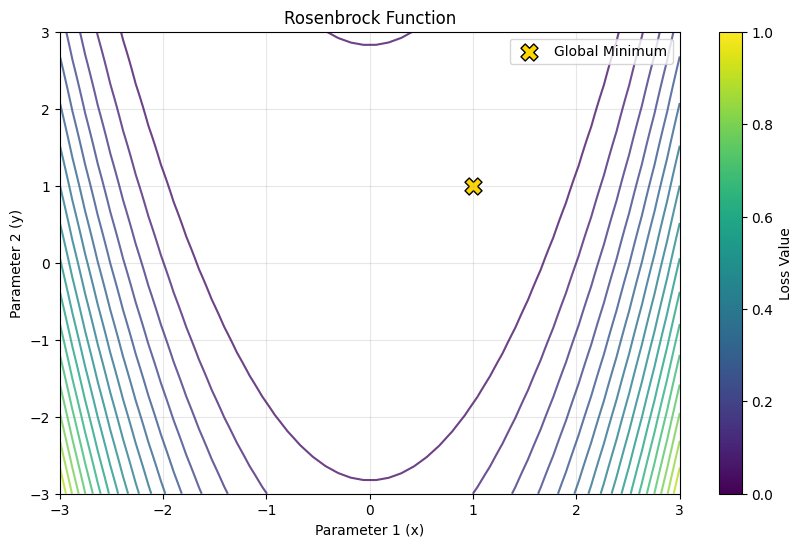

In [37]:
#@title Visualizer for Optimizers

#@markdown You don't really have to look at it, so just run the block with the play button.

#@markdown * If you open up the code, double-click the right side of the cell to hide it again


import torch.optim as optim
import matplotlib.pyplot as plt

def optimize(custom_optimizer=None, torch_optimizer=None, loss_fn=rosenbrock, steps=1000, title="Rosenbrock Function"):
    optimizer1_name = "Your Optimizer"
    optimizer2_name = "PyTorch Optimizer"
    start_position = [-2.5, -2.5]

    # Create loss landscape
    x = np.linspace(-3, 3, 50)
    X, Y = np.meshgrid(x, x)
    Z = loss_fn(torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32)).numpy()

    if not custom_optimizer:
        # Just plot landscape
        plt.figure(figsize=(10, 6))
        plt.contour(X, Y, Z, levels=20, alpha=0.8)
        plt.scatter(1, 1, color='gold', s=150, marker='X', label='Global Minimum', edgecolors='black')
        plt.title(title)
        plt.xlabel('Parameter 1 (x)')
        plt.ylabel('Parameter 2 (y)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.colorbar(label='Loss Value')
        plt.show()
        return None

    optimizers = [torch_optimizer, custom_optimizer]
    names = ['PyTorch Implementation', 'Your Implementation']
    colors = ['blue', 'red']
    active = [(opt, name, color) for opt, name, color in zip(optimizers, names, colors) if opt is not None]

    # Plot with optimizers
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    for i, (optimizer, name, color) in enumerate(active):
        ax = axes[i]
        ax.contour(X, Y, Z, levels=20, alpha=0.8)
        ax.scatter(1, 1, color='gold', s=150, marker='X', label='Global Minimum', edgecolors='black')

        # Run optimizer and track path
        position = torch.tensor([-2.5, -2.5], dtype=torch.float32, requires_grad=True)

        # Instantiate optimizer with position as parameter
        if callable(optimizer):
            opt = optimizer([position])  # Call the lambda function
        else:
            opt = optimizer

        path = [position.detach().numpy().copy()]

        for _ in range(steps):
            opt.zero_grad()
            loss = loss_fn(position[0], position[1])
            loss.backward()
            opt.step()
            path.append(position.detach().numpy().copy())

        path = np.array(path)
        ax.plot(path[:, 0], path[:, 1], color, linewidth=2, alpha=0.8, label='Optimization Path')
        ax.scatter(*path[0], color='green', s=100, label='Start')
        ax.scatter(*path[-1], color='red', s=100, marker='*', label='End')

        ax.set_title(f"{title} - {name}")
        ax.set_xlabel('Parameter 1 (x)')
        ax.set_ylabel('Parameter 2 (y)')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    return None

optimize()

## **(Stochastic) Gradient Descent**

To train neural networks, we can change their parameters $\theta$ in a way to minimize a loss function. In order to decide what weight changes would best minimize the loss function, we calculate the gradient of the loss with respect to the parameters, which indicates the direction of steepest ascent.

Thus, we subtract the gradient scaled by some learning rate/scaling factor $\alpha$ and we arrive at the formula for gradient descent.

$$\theta_t = \theta_{t-1} - \alpha \nabla L(\theta_{t-1})$$

<br>

Though this formula might be very familiar, it does not represent specifically the procedure of Stochastic Gradient Descent, which is more accurate in describing the way deep networks are trained.

<br>

Revisiting our discussion about batches, standard "batch" gradient descent refers to evaluating the entire dataset and averaging the calculated gradients to update the weights. This is not used to train networks as not only is it very expensive to evaluate the gradient on the entire dataset for every iteration, this also generally leads the network to solutions that overfit and do not generalize.

Stochastic gradient descent is where random subsets, "mini-batches", of the training data are chosen to approximate the true gradient. Though it would increase stochasticity and decrease compute time to evaluate the gradient on single examples, the variance of gradient between single examples generally prevents the network from converging to neither quick nor effective solutions. Thus, the mini-batch size remains an important parameter that can make significant differences in the convergence, training time, or generalization of the network for non-trivial tasks.

## **Learn how to Implement an Optimizer**

Read the implementation below to see how to implement an optimizer. Notice that we are using  `for param in self.params` to update the parameters per step/iteration it takes.

In [38]:
# First, we are going to define a parent class that all of our optimizers will inherit
# from. This is the subclassing behavior you should get used to in PyTorch
class Optimizer:
    def __init__(self, parameters, learning_rate):
        self.learning_rate = learning_rate
        self.params = parameters

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

    # This method will be implemented by the child classes :)
    def step(self):
        raise NotImplementedError()


In [39]:
class SGD(Optimizer):
    def __init__(self, params, learning_rate):
        # This initalizes your instance variables by calling the parent constructor
        super().__init__(params, learning_rate)

    # Now, we implement the step method
    def step(self):
        # We need to include the no_grad to make sure the graph ignores this computation
        with torch.no_grad():
            # Iterate over each of your paramters
            for param in self.params:
              # per step uses the learning_rate to move closer to global minimum
              param -= param.grad * self.learning_rate

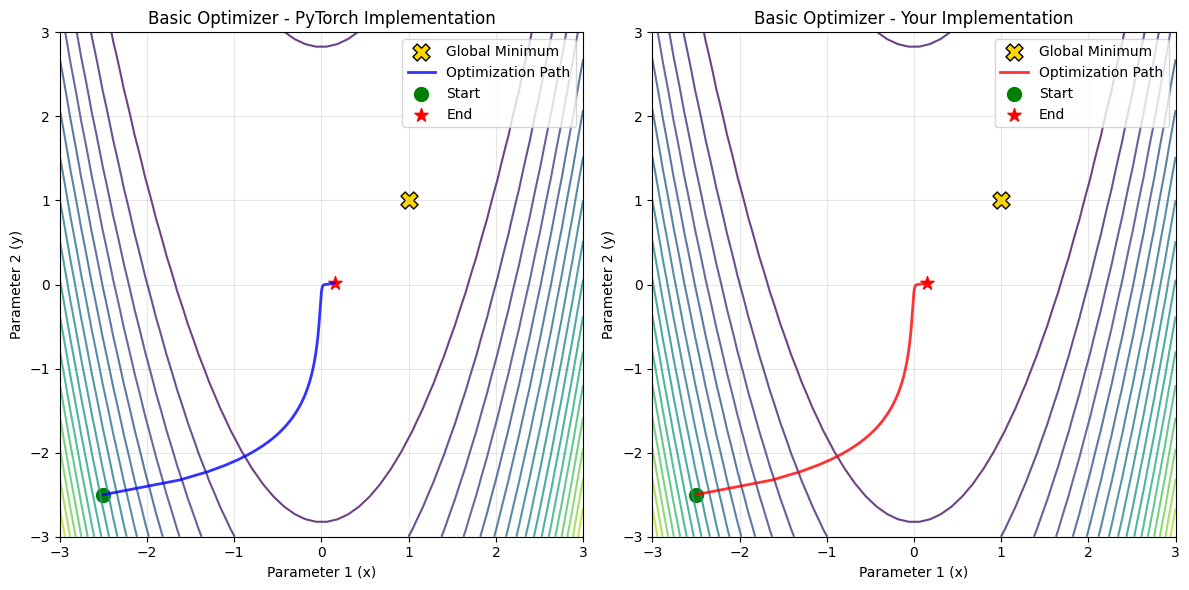

In [41]:
# Now we can plot our custom implementation of SGD plotted next to PyTorch
optimize(
    custom_optimizer=lambda params: SGD(params, learning_rate=0.0001),
    torch_optimizer=lambda params: optim.SGD(params, lr=0.0001),
    title="Basic Optimizer"
)

## **[TODO] ✅ Implement Gradient Descent with Momentum**

Gradient descent can easily find the valley of the Rosenbrock function, but since the magnitude of the gradient is so low along the valley, gradient descent gets stuck.

With momentum, the parameters move by some fraction of the previous step along with the current gradient. This is similar to how a ball rolling down a hill will speed up over time.


$$v_t = \lambda v_{t-1} + \alpha \nabla L(\theta)$$

$$\theta_t = \theta_{t-1} - v_t$$

An additional variable $v$ is used to keep track of the velocity. When $\lambda = 0$, it's as if the ball is rolling on a frictionless surface, since it will keep all of it's previous velocity. A typical value for $\lambda$ is $0.9$.

**Implement gradient descent with momentum below. Check to see that your implementation matches the PyTorch implementation.**

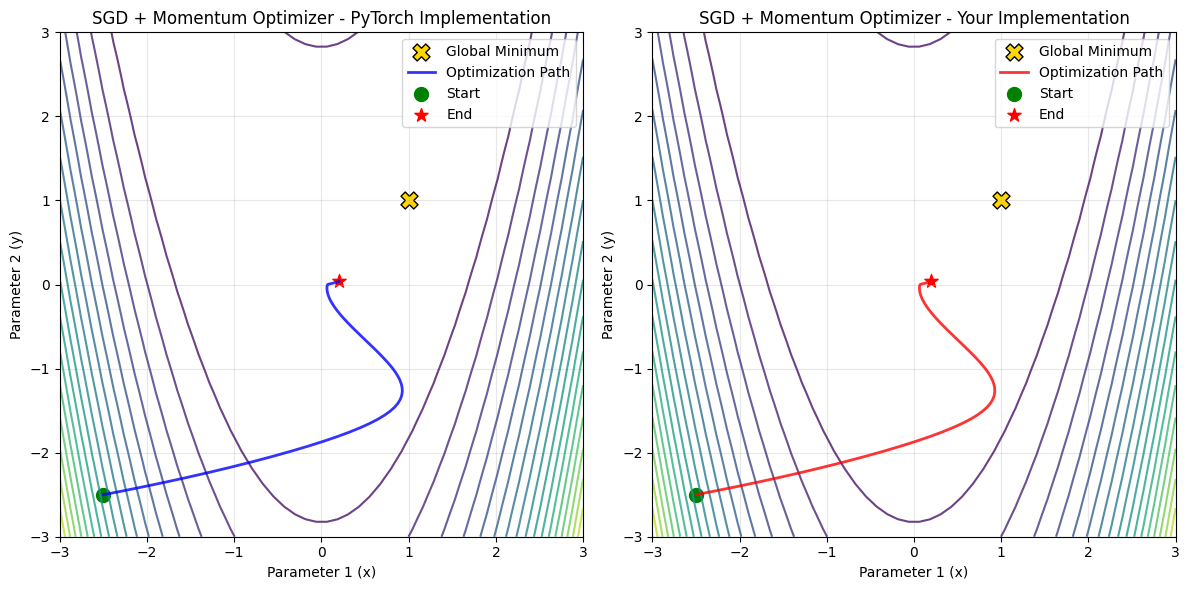

In [47]:
learning_rate = 0.00001
lambda_ = 0.9

# Your implementation of SGD with momentum
class SGDMomentum(Optimizer):
    def __init__(self, params, learning_rate):
        super().__init__(params, learning_rate)
        self.lambda_ = lambda_
        self.v = [torch.zeros_like(p) for p in self.params]  # Velocity for each parameter

    def step(self):
        with torch.no_grad():
            for i, param in enumerate(self.params):
                if param.grad is not None:
                    # TODO: Implement
                    self.v[i] = self.lambda_ * self.v[i] + self.learning_rate * param.grad #HINT: v = λ * v + gradient
                    param -= self.v[i]

optimize(
    custom_optimizer=lambda params: SGDMomentum(params, learning_rate=learning_rate),
    torch_optimizer=lambda params: optim.SGD(params, lr=learning_rate, momentum=lambda_),
    title="SGD + Momentum Optimizer"
)

## **[TODO] ✅ Implement RMSProp**

RMSProp is similar to Adagrad, but seeks to solve the problem of the decaying learning rate. Instead of storing a sum of all of the past squared gradients, RMSprop keeps a exponentially decaying running average:

The running average is updated as follows:
$$ g_t^{(i)} =  \rho g_{t-1}^{(i)} + (1 - \rho)\Big(\frac{\partial}{\partial \theta^{(i)}}L(\theta_{t-1})\Big)^2 $$

Then, the parameter update is the same as for Adagrad. Dividing the learning rate by this exponential average will cause the learning to speed up in directions with lower gradients. This is what we want when navigating the valley of the Rosenbrock function.

$$
\theta_t^{(i)} = \theta_{t-1}^{(i)} - \frac{\alpha}{\sqrt{g^{(i)}_t} + \epsilon} * \frac{\partial}{\partial\theta^{(i)}}L(\theta_{t-1})
$$

**Implement RMSprop below, and check to see that your implementation matches the PyTorch implementation:**

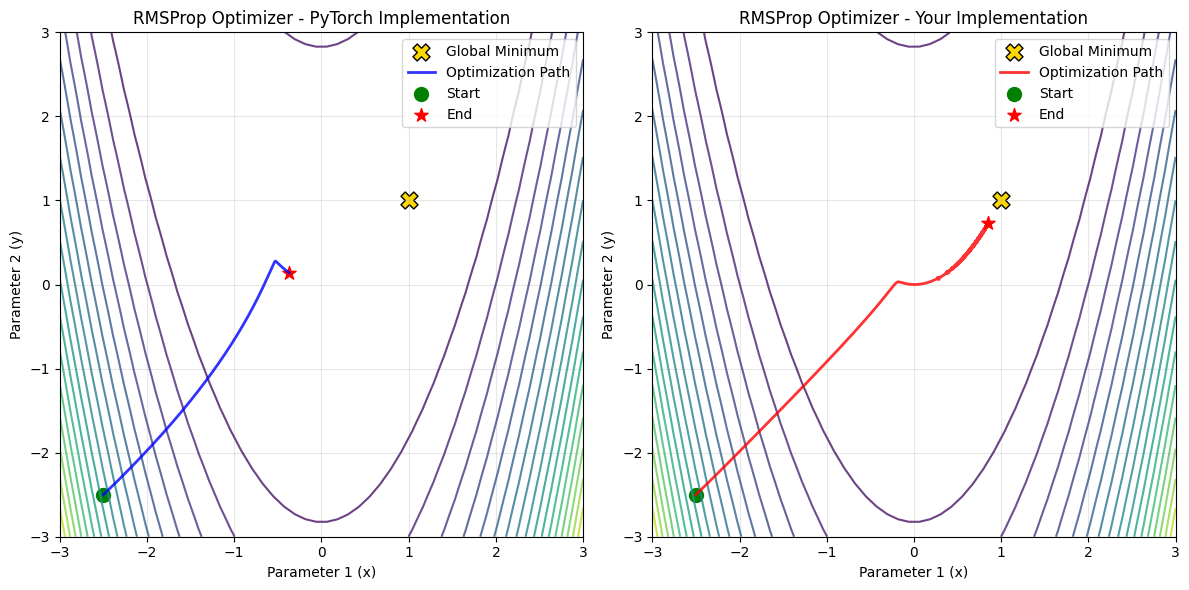

In [48]:
learning_rate = 0.01

# Your implementation of RMSprop
class RMSprop(Optimizer):
    def __init__(self, params, learning_rate):
        super().__init__(params, learning_rate)
        self.epsilon = 1e-7
        self.rho = 0.9  # Scaling factor for exponential average
        self.mean_square = [torch.zeros_like(p) for p in self.params]  # Mean square for each parameter

    def step(self):
        with torch.no_grad():
            for i, param in enumerate(self.params):
                if param.grad is not None:
                    # TODO: Implement
                    self.mean_square[i] = self.rho * self.mean_square[i] + (1 - self.rho) * param.grad ** 2
                    param -= (self.learning_rate / (torch.sqrt(self.mean_square[i]) + self.epsilon)) * param.grad

optimize(
    custom_optimizer=lambda params: RMSprop(params, learning_rate=learning_rate),
    torch_optimizer=lambda params: optim.RMSprop(params, lr=learning_rate),
    title="RMSProp Optimizer"
)

## **[TODO] ✅ Implement Adam (Adaptive Moment Estimation) Optimizer**

Adam is an iteration of previous algorithms which tries to estimate the first and second moments of the gradients.

The first moment is the expected value of the gradients, and the second moment is the expected value of the square of the gradients. Adam uses exponentially decaying averages to estimate these moments based on past gradients. $\beta_1$ and $\beta_2$ are the scaling factors for the exponential average, and the default values are $\beta_1=0.9$ and $\beta_2=0.999$.

$$m^{(i)}_t = \beta_1 m_{t-1} + (1 - \beta_1) \Big(\frac{\partial}{\partial \theta^{(i)}}L(\theta_{t-1})\Big)$$
$$v^{(i)}_t = \beta_2 v_{t-1} + (1 - \beta_2) \Big(\frac{\partial}{\partial \theta^{(i)}}L(\theta_{t-1})\Big)^2$$

However, these estimates are biased towards 0, so __when updating the parameters__ Adam scales them as follows:

$$\hat{m} = \frac{m}{1-\beta_1^t}$$

$$\hat{v} = \frac{v}{1-\beta_2^t}$$

(*Note:* the $t$ in the denominators of $\hat{m}$ and $\hat{v}$ is an exponentiation.)

The parameter update for Adam is then:

$$ \theta_t^{(i)} = \theta_{t-1}^{(i)} - \alpha * \frac{\hat{m}^{(i)}_t}{\sqrt{\hat{v}^{(i)}_t} + \epsilon} $$

Notice that the first moment is similar to the momentum in SGD with momentum, and the second moment is similar to the sum of squared gradients in RMSprop.

**Implement Adam below, and check to see that your implementation matches the PyTorch implementation.**

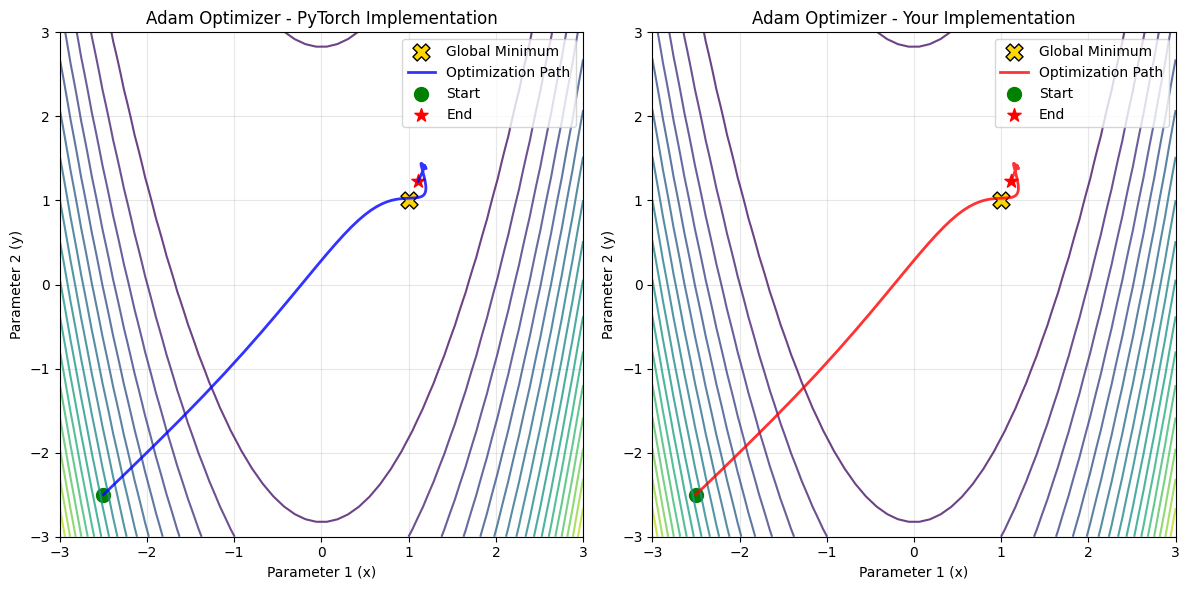

In [50]:
import torch
import torch.optim as optim

learning_rate = 0.3

# Your implementation of Adam
class Adam(Optimizer):
    def __init__(self, params, learning_rate):
        super().__init__(params, learning_rate)
        self.epsilon = 1e-7
        self.beta_1 = 0.9
        self.beta_2 = 0.999

        self.m = [torch.zeros_like(p) for p in self.params]  # First moment for each parameter
        self.v = [torch.zeros_like(p) for p in self.params]  # Second moment for each parameter
        self.t = 0  # Time counter

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

    def step(self):
        # We make sure to increment the timestep
        self.t += 1

        with torch.no_grad():
            for i, param in enumerate(self.params):
                if param.grad is not None:
                    # Update first moment (mean of gradients)
                    self.m[i] = self.beta_1 * self.m[i] + (1 - self.beta_1) * param.grad
                    # Update second moment (mean of squared gradients)
                    self.v[i] = self.beta_2 * self.v[i] + (1 - self.beta_2) * param.grad ** 2
                    # Bias-corrected moments
                    m_hat = self.m[i] / (1 - self.beta_1 ** self.t)
                    v_hat = self.v[i] / (1 - self.beta_2 ** self.t)
                    # Update parameters
                    param -= self.learning_rate * m_hat / (torch.sqrt(v_hat) + self.epsilon)

optimize(
    custom_optimizer=lambda params: Adam(params, learning_rate=learning_rate),
    torch_optimizer=lambda params: optim.Adam(params, lr=learning_rate),
    title="Adam Optimizer"
)

# **Putting it All Together: Building a Model!**

You have now gone over all of the fundementals needed to prepare you to tackle the course. Both of these are large libraries which feel endless. In saying that, you should not worry if it feels like we barely scratched the surface since most things are a simple google search away.

Let's put everything we went over all together in one last TODO.


## [**TODO] ✅ Building Your First Real-World Classifier: MNIST Digit Recognition**

Congratulations! You've mastered the essential NumPy and PyTorch tools for the Deep Research Facility. Now let's put it all together. You are tasked with building a neural network that can recognize handwritten digits from the famous MNIST dataset, as you have seen in class.

### **Understanding the MNIST Dataset**

The MNIST dataset contains 70,000 images of handwritten digits (0-9), each 28x28 pixels. This is a classic dataset in machine learning for a cornerstone representation of the power of deep learning.

**Let's take a look at a sample images and inspect the data attributes by running the follwing cell! You do not need to fill anything in, just run the cell and inspect the output**

100.0%
100.0%
100.0%

100.0%

100.0%

================= DATA ATTRIBUTES =====================
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Single image shape: (28, 28)
Pixel value range: 0 to 255


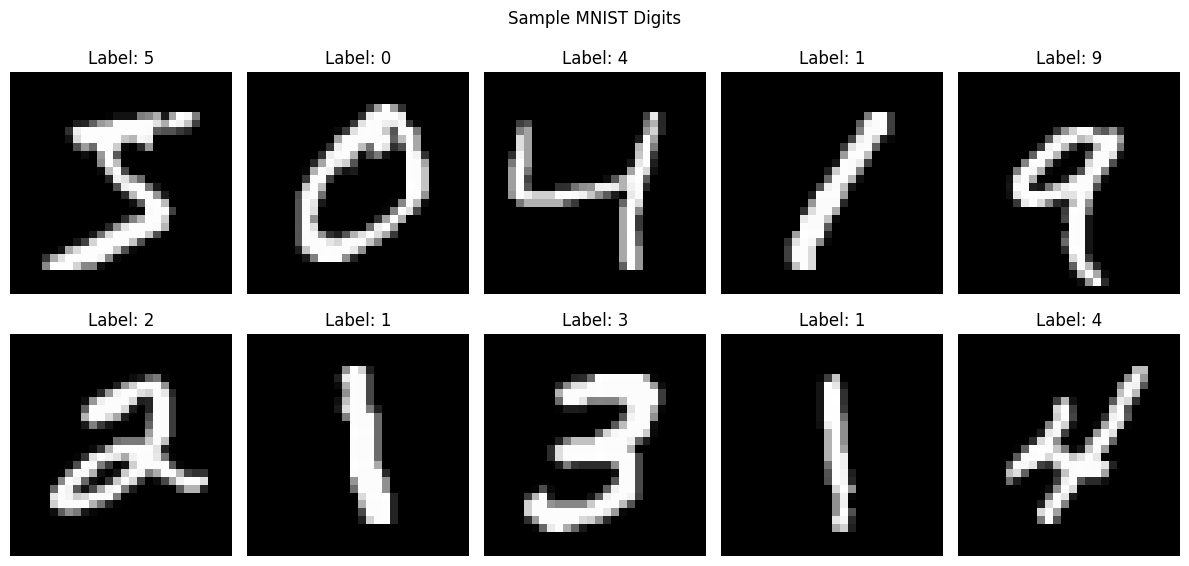

In [ ]:
import torchvision
import matplotlib.pyplot as plt

# had to add these two to run locally (some weird issue with macOS on VSC? had to get claude to fix this with these imports)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Download and load training data
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=None)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Extract data as numpy arrays (to match TensorFlow format)
X_train = train_dataset.data.numpy()
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()

# Let's print out some attributes about the data so we know what we are working with
print(f"================= DATA ATTRIBUTES =====================")
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Examine a single image in detail
print(f"Single image shape: {X_train[0].shape}")
print(f"Pixel value range: {X_train[0].min()} to {X_train[0].max()}")

print(f"=======================================================")

# Let's look at some example digits
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Digits')
plt.tight_layout()
plt.show()

### **Preprocessing**
First, we need to preprocess our data. This means getting out data in the correct format for our model. We are training a perceptron which means our data needs to be in a specific format.

Neural networks work best with normalized, flattened data. We need to transform our 28x28 pixel images into the right format for our dense layers. We define the three key focuses of our preprocessing pipeline for MNIST:

- **Normalization**: Pixel values range from 0-255, but neural networks train better with values between 0-1
- **Flattening**: Our Dense layers expect 1D input, but images are 2D matrices
- **Data type**: We need consistent `dtype=torch.float32` or `torch.long` tensors for PyTorch



#### **[TODO] ✅ Fill in the following cell to complete the preprocessing necessary to transform the MNIST dataset**


##### HINT: Review NumPy Functions in the previous sections, some might look useful below.

In [54]:
def preprocess_images(images):
    """
    Preprocess MNIST images for neural network training

    Args:
        images (np.ndarray): Raw MNIST images as a numpy array with shape (num_samples, 28, 28)

    Returns (np.npdarray):
        Preprocessed images ready for neural network as a numpy array with shape (num_samples, 784)
    """
    # =============================================================
    # | TODO 1: Normalize pixel values from [0, 255] to [0, 1]    |
    # |                                                           |
    # | HINT: How can we easily divide all values without a loop? |
    # |       (ahem numpy array)                                  |
    # =============================================================
    images = images / 255.0
    


    # ===============================================================
    # | TODO 2: Flatten each 28x28 image into a 784-dimensional     |
    # |         vector.                                             |
    # | This transforms (num_samples, 28, 28) -> (num_samples, 784) |
    # | (ahem numpy array using reshape and think about how to keep)|
    # |  the same first dimension, but flatten second)              |
    # |                                                             |
    # | (HINT: If you use -1 as the trailing dimension, it collapses|
    # |  anything that comes after it and read to docs)             |
    # ===============================================================
    images = images.reshape(images.shape[0], -1)


    # ===============================================================
    # | TODO 3: Cast the flattened tensor to np.float32             |
    # | This transforms (num_samples, 28, 28) -> (num_samples, 784) |
    # |       (Hint: You can use astype(np.float32))                |
    # ===============================================================
    images = images.astype(np.float32)

    return images

Now run the following cell to inspect the results of your preprocessing function. The expected results are for a single example and are shown below. **Run the cell to make sure you get the same output.**

In [55]:
# Let's see the preprocessing in action
print("Before preprocessing:")
print(f"Shape: {X_train[0].shape}")
print(f"Data type: {X_train.dtype} {type(X_train)}")
print(f"Value range: {X_train[0].min()} to {X_train[0].max()}")

# Preprocess our data
X_train_processed = preprocess_images(X_train)
X_test_processed = preprocess_images(X_test)

print("\nAfter preprocessing:")
print(f"Shape: {X_train_processed[0].shape}")
print(f"Data type: {X_train_processed.dtype}")
print(f"Value range: {X_train_processed[0].min():.3f} to {X_train_processed[0].max():.3f}")

Before preprocessing:
Shape: (28, 28)
Data type: uint8 <class 'numpy.ndarray'>
Value range: 0 to 255

After preprocessing:
Shape: (784,)
Data type: float32
Value range: 0.000 to 1.000


```
Before preprocessing:
Shape: (28, 28)
Data type: uint8 <class 'numpy.ndarray'>
Value range: 0 to 255

After preprocessing:
Shape: (784,) # Flattened vector
Data type: float32 # correct datatype for tensor  
Value range: 0.000 to 1.000 # Now see only between [0, 1]
```

### **[TODO]** ✅ **Build Your MNIST Classifier**
Now it's time to build your classifier! You'll create a neural network that can distinguish between all 10 digits.

In [57]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()

        # =================================================
        # | TODO 1: Define your layers                    |
        # |                                               |
        # | Your input will be 784 features (28*28)       |
        # | Your output should be 10 classes (digits 0-9) |
        # |                                               |
        # | Suggested architecture:                       |
        # | Input (784) -> Hidden1 (128) -> Hidden2 (64)  |
        # | -> Output (10)                                |
        # |                                               |
        # | Don't forget activation functions             |
        # | Use 'relu' for hidden layers and 'softmax'    |
        # | for the output layer                          |
        # =================================================

        # self.hidden1 = # TODO: linear layer with 128 units
        self.hidden1 = nn.Linear(784, 128)

        # self.relu1 = # TODO: ReLU activation function
        self.relu1 = nn.ReLU()

        # self.hidden2 = # TODO: linear layer with 64 units
        self.hidden2 = nn.Linear(128, 64)

        # self.relu2 = # TODO: ReLU activation function
        self.relu2 = nn.ReLU()

        # self.output_layer = # TODO: linear layer with 10 units
        self.output_layer = nn.Linear(64, 10)

        # self.softmax = # TODO: Softmax activation function
        self.softmax = nn.Softmax(dim=1)

    def forward(self, inputs):
        # =================================================
        # | TODO 2: Define the forward pass               |
        # |                                               |
        # | Pass the input through your layers in order   |
        # | Input->Hidden1->relu1->Hidden2->relu2-> Output|
        # =================================================

        x = self.hidden1(inputs)
        x = self.relu1(x)

        x = self.hidden2(x)
        x = self.relu2(x)

        outputs = self.output_layer(x)
        outputs = self.softmax(outputs)

        return outputs


Now that you have set up your architecture, we need to bring it all together with the training loop. This is the most important part that will orchestrate all of the parts we put together above into our final output.

Follow the TODOs in the code block below.

*You will notice we have provided you with the loss and accuracy functions. However, it is your to call the loss function! IMPORTANT: Read the [documentation](https://docs.pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) on the order of parameters for the `call` method!*

In [59]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# =================================================
# | TODO 3: Initialize your model and optimizer   |
# =================================================

model = MNISTClassifier() # TODO: Create an instance of your MNISTClassifier

# TODO: Choose an optimizer (HINT: Adam with lr=0.001 works well!)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_steps = 1000                # Uncomment for quick run
# train_steps = 5000              # Uncomment for full run when ready
# train_steps = 10000             # If you need this, maybe check your architecture

# We will define the loss using PyTorch (they like calling loss criterion)
criterion = nn.CrossEntropyLoss()

# A good idea is printing lines to track performance start and end (great for debugging)
print("Starting training...")

# NOTE: During BERAS, you will need to implement batching during
# your training loop. Here, we're processing one example at a time
# to keep things simple
for i in range(train_steps):

    # Get a random training example (this is jank), for the future we'll use operations such as train_test_split()
    idx = np.random.randint(0, len(X_train_processed))

    # Get the data in the right shape (1 example at a time)
    X = X_train_processed[idx].reshape(1, -1)
    Y = y_train[idx]  # PyTorch CrossEntropyLoss expects class indices, not one-hot

    # Convert to float32 tensors
    x = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor([Y], dtype=torch.long)  # Class index as long tensor

    # Training step
    # ============================
    # | TODO 4: Call your model. |
    # ============================
    predictions = model(x)

    # Compute loss for this example
    # ============================
    # | TODO 5: Compute loss     |
    # ============================
    loss = criterion(predictions, y)

    if i % 200 == 0:
        # Calculate accuracy
        pred_class = torch.argmax(predictions, dim=1)
        train_acc = (pred_class == y).float().mean()
        print(f"Step {i}/{train_steps} - Loss: {loss.item():.4f}, Accuracy: {train_acc.item():.4f}")

    # =================================================
    # | TODO 6: Compute and apply gradients           |
    # =================================================

    # Make sure to do this before your optimizer
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()
    # TODO: Compute gradients using backward()

    optimizer.step()
    # This line is important! You will use this for every neural network!
    # You will be implementing this from scratch in the next assignment :)

print("Training complete!")

# =============================================
# | TODO 7: Run the cell to train your model. |

# =============================================# =============================================

Starting training...
Step 0/1000 - Loss: 2.3073, Accuracy: 0.0000
Step 200/1000 - Loss: 2.3866, Accuracy: 0.0000
Step 400/1000 - Loss: 1.5024, Accuracy: 1.0000
Step 600/1000 - Loss: 2.3707, Accuracy: 0.0000
Step 400/1000 - Loss: 1.5024, Accuracy: 1.0000
Step 600/1000 - Loss: 2.3707, Accuracy: 0.0000
Step 800/1000 - Loss: 1.4679, Accuracy: 1.0000
Training complete!
Step 800/1000 - Loss: 1.4679, Accuracy: 1.0000
Training complete!


Ok, now we can test your model and see some fun predictions. Run the following cell which will do the following:
1. It will evaluate the model performance by running the test dataset over the trained model, tracking its accuracy
2. The `predict_digit` function will then run a single example and visualize the results so you can see your model in action :)

**There is nothing for you to fill in in this cell. Just run the block to see your output**

Test Accuracy on 1000 examples: 0.6960


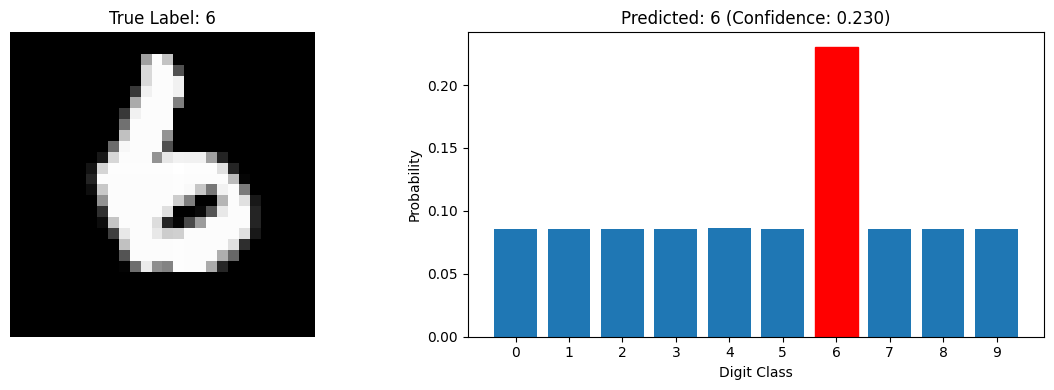

Example 1: Predicted 6 with 0.230 confidence


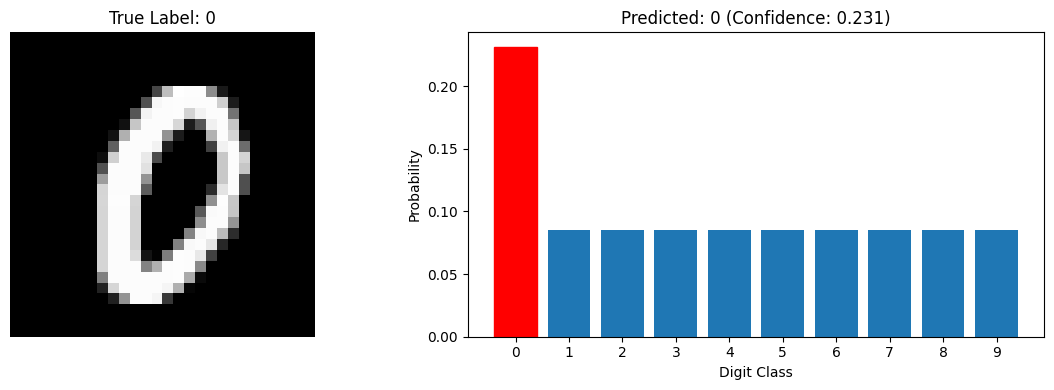

Example 2: Predicted 0 with 0.231 confidence


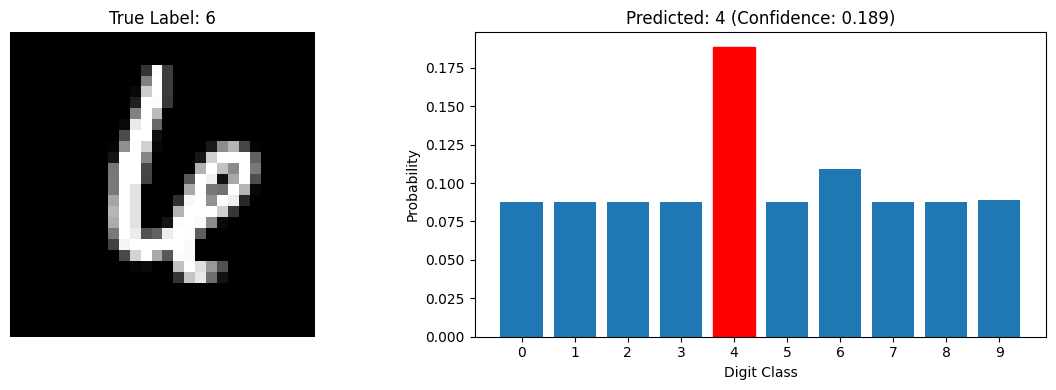

Example 3: Predicted 4 with 0.189 confidence


In [60]:
def predict_digit(image_index):
    # Get the image and true label
    image = X_test[image_index]
    true_label = y_test[image_index]

    # preprocess the image using your function
    processed_image = torch.tensor(X_test_processed[image_index].reshape(1, -1), dtype=torch.float32)

    # prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for inference
        prediction = model(processed_image)
        predicted_class = torch.argmax(prediction, dim=1).item()
        confidence = nn.functional.softmax(prediction, dim=1).numpy()[0]

    # Visualize
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {true_label}')
    plt.axis('off')

    # Show prediction probabilities
    plt.subplot(1, 2, 2)
    bars = plt.bar(range(10), confidence)
    bars[predicted_class].set_color('red')
    plt.title(f'Predicted: {predicted_class} (Confidence: {confidence[predicted_class]:.3f})')
    plt.xlabel('Digit Class')
    plt.ylabel('Probability')
    plt.xticks(range(10))

    plt.tight_layout()
    plt.show()

    return predicted_class, confidence[predicted_class]

# Only testing on a subset of 1000 examples
test_sample_size = 1000
correct_predictions = 0

model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient computation for inference
    for i in range(test_sample_size):
        x_test = torch.tensor(X_test_processed[i].reshape(1, -1), dtype=torch.float32)
        y_true = y_test[i]

        prediction = model(x_test)
        predicted_class = torch.argmax(prediction, dim=1).item()

        if predicted_class == y_true:
            correct_predictions += 1

accuracy = correct_predictions / test_sample_size
print(f"Test Accuracy on {test_sample_size} examples: {accuracy:.4f}")

for i in range(3):
    random_idx = np.random.randint(0, len(X_test))
    pred_class, confidence = predict_digit(random_idx)
    print(f"Example {i+1}: Predicted {pred_class} with {confidence:.3f} confidence")

You have now just implemented your first neural network for MNIST classification. On the next assignment, you will be implementing these constructs (Linear, Backwards, Activations, etc.) from scratch in the next assignment, so make sure you understand how each of these work :)

# **Congrats** 🎉

Congrats on completing Assignment 2! This was a big one!

You should now be comfortable working with `NumPy` and `PyTorch` enough to complete the first assignment. We will be diving into many concepts we took for granted in this mini-project, such as `Gradients`, `Linear` layers, `Activations`, etc. and seeing how it all ticks to make these amazing models.
